# Задание по теме «Численное дифференцирование»

Таблично задать на указанном интервале функцию и найти ее производные в узлах таблицы и точках, находящихся посередине между узлами таблицы. Для проведения операции дифференцирования заданный интервал разбить на 20 участков.

Вариант-2:
$$
f(x) = e^xsin\ x,\ [1;2]
$$

Задаю таблицу

In [2]:
import numpy as np
X = np.linspace(1.0, 2.0, 21)
print('X:')
print(X)
Y = np.exp(X) * np.sin(X)
print('Y:')
print(Y)

X:
[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
Y:
[2.28735529 2.47879295 2.67733487 2.8826846  3.09447874 3.31228178
 3.53558084 3.76378019 3.99619571 4.23204916 4.47046238 4.71045139
 4.95092047 5.19065609 5.428321   5.66244816 5.89143485 6.1135368
 6.3268625  6.52936761 6.7188497 ]


Нахожу таблицу конечных разностей

In [3]:
def find_def_matrix(Y):
    n = Y.shape[0]
    d_y = np.zeros((n,n))
    d_y[0] = Y
    for i in range(1, n):
        for j in range(n-i):
            d_y[i][j] = np.round((d_y[i-1][j+1] - d_y[i-1][j]), 6)
    return(d_y)
d_y = find_def_matrix(Y)
print(d_y)

[[ 2.28735529e+00  2.47879295e+00  2.67733487e+00  2.88268460e+00
   3.09447874e+00  3.31228178e+00  3.53558084e+00  3.76378019e+00
   3.99619571e+00  4.23204916e+00  4.47046238e+00  4.71045139e+00
   4.95092047e+00  5.19065609e+00  5.42832100e+00  5.66244816e+00
   5.89143485e+00  6.11353680e+00  6.32686250e+00  6.52936761e+00
   6.71884970e+00]
 [ 1.91438000e-01  1.98542000e-01  2.05350000e-01  2.11794000e-01
   2.17803000e-01  2.23299000e-01  2.28199000e-01  2.32416000e-01
   2.35853000e-01  2.38413000e-01  2.39989000e-01  2.40469000e-01
   2.39736000e-01  2.37665000e-01  2.34127000e-01  2.28987000e-01
   2.22102000e-01  2.13326000e-01  2.02505000e-01  1.89482000e-01
   0.00000000e+00]
 [ 7.10400000e-03  6.80800000e-03  6.44400000e-03  6.00900000e-03
   5.49600000e-03  4.90000000e-03  4.21700000e-03  3.43700000e-03
   2.56000000e-03  1.57600000e-03  4.80000000e-04 -7.33000000e-04
  -2.07100000e-03 -3.53800000e-03 -5.14000000e-03 -6.88500000e-03
  -8.77600000e-03 -1.08210000e-02 -1.3

Дифференцирую

In [6]:
h = X[1]-X[0]
def find_diff(value, X, d_y, h):
    d_y_temp = []
    if value in X:
        i = np.where(X == value)[0][0]
        d_y_temp = d_y[1:d_y.shape[1]-i,i]
        sum = 0
        for j in range(d_y_temp.shape[0]):
            if j%2 == 0:
                sum += d_y_temp[j]/(j+1)
            else:
                sum -= d_y_temp[j]/(j+1)
        return(sum/h)
    else:
        x0 = 0
        for k in range(X.shape[0]):
            if X[k] < value and X[k+1] > value:
                x0 = X[k]
        i = np.where(X == x0)[0][0]
        d_y_temp = d_y[1:d_y.shape[1],i]
        t = (value-x0)/h
        fx = 1/h * (d_y_temp[0] + ((2*t - 1)/2)*d_y_temp[1] - ((3*t**2 - 6*t + 2)/6)*d_y_temp[2])
        return(fx)

Сравнение производных

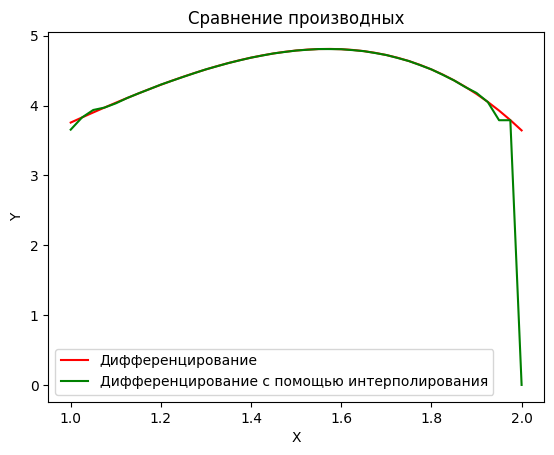

In [8]:
xx = np.linspace(1.0, 2.0, 41)
y_1 = []
y_2 = []
y_3 = []
for x in xx:
    y_1.append(np.exp(x) * np.sin(x) + np.exp(x) * np.cos(x))
    y_2.append(find_diff(x, X, d_y, h))

import matplotlib.pyplot as plt
plt.plot(xx, y_1, color='r', label='Дифференцирование')
plt.plot(xx, y_2, color='g', label='Дифференцирование с помощью интерполирования')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Сравнение производных")
plt.legend()
plt.show()